In [1]:
%load_ext cudf.pandas

In [2]:
import pandas as pd
import numpy as np

# DataFrame Styling Code

In [3]:
def style_columns(dataframe, key_cols, left_cols, right_cols, calc_cols):
    
    styles = pd.DataFrame("", index=dataframe.index, columns=dataframe.columns)
    
    for col in dataframe.columns:
        
        if col in key_cols:
            styles[col] = "background-color: lightgreen"
            
        elif col in left_cols:
            styles[col] = "background-color: lightyellow"
            
        elif col in right_cols:
            styles[col] = "background-color: lightblue"

        elif col in calc_cols:
            styles[col] = "background-color: pink"            
            
    return styles

In [4]:
cols = {
    'key_cols':['grade', 'grade_x', 'grade_y', 'item', 'item_x', 'item_y'],
    'left_cols':['name', 'n_sold'], 
    'right_cols':['letter', 'price'],
    'calc_cols': ['revenue']
}

https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge
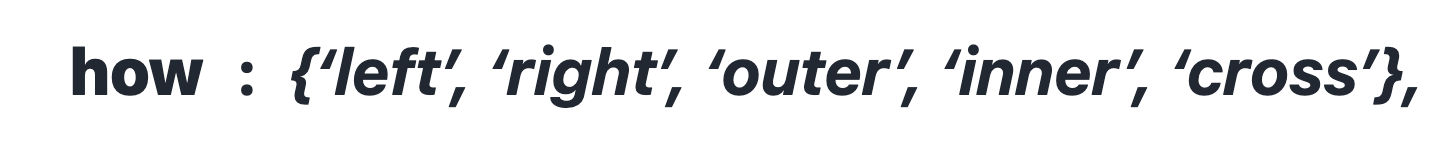

---

---

# Student-Grade

In [5]:
student_grades = pd.DataFrame({
    "name": ["Ada", "Bob", "Cam", "Dan"],
    "grade": [90, 80, 70, -1],
})

student_grades                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols)

,name,grade
0,Ada,90
1,Bob,80
2,Cam,70
3,Dan,-1


# Grade-Letter

In [6]:
grade_letter = pd.DataFrame({
    'grade': [90, 80, 70, 60, 50],
    'letter': ['A', 'B', 'C', 'D', 'F']
})
grade_letter                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols)

,grade,letter
0,90,A
1,80,B
2,70,C
3,60,D
4,50,F


# left

##### validate
* “one_to_one” or “1:1”: check if merge keys are unique in both left and right datasets
* “one_to_many” or “1:m”: check if merge keys are unique in left dataset.
* “many_to_one” or “m:1”: check if merge keys are unique in right dataset.
* “many_to_many” or “m:m”: allowed, but does not result in checks.

In [7]:
# left
student_grades.merge(
    right=grade_letter, 
    on='grade', 
    how='left',
    indicator=True)                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols)

,name,grade,letter,_merge
0,Ada,90,A,both
1,Bob,80,B,both
2,Cam,70,C,both
3,Dan,-1,nan,left_only


# right

In [8]:
# right
student_grades.merge(
    right=grade_letter, 
    on='grade', 
    how='right',
    indicator=True)                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols)

,name,grade,letter,_merge
0,Ada,90,A,both
1,Bob,80,B,both
2,Cam,70,C,both
3,nan,60,D,right_only
4,nan,50,F,right_only


# outer

In [9]:
# outer
student_grades.merge(
    right=grade_letter, 
    on='grade', 
    how='outer',
    indicator=True)                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols)

,name,grade,letter,_merge
0,Dan,-1,nan,left_only
1,nan,50,F,right_only
2,nan,60,D,right_only
3,Cam,70,C,both
4,Bob,80,B,both
5,Ada,90,A,both


# inner (default)

In [10]:
# inner
student_grades.merge(
    right=grade_letter, 
    on='grade', 
    how='inner', 
    indicator=True)                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols)

,name,grade,letter,_merge
0,Ada,90,A,both
1,Bob,80,B,both
2,Cam,70,C,both


# cross

In [11]:
# cross
student_grades.merge(
    right=grade_letter, 
    how='cross',
    indicator=True)                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols)

,name,grade_x,grade_y,letter,_merge
0,Ada,90,90,A,both
1,Ada,90,80,B,both
2,Ada,90,70,C,both
3,Ada,90,60,D,both
4,Ada,90,50,F,both
5,Bob,80,90,A,both
6,Bob,80,80,B,both
7,Bob,80,70,C,both
8,Bob,80,60,D,both
9,Bob,80,50,F,both


---

---

# Sales

In [12]:
sales = pd.DataFrame({
    'n_sold': [3,4,1],
    'item': ['pen', 'pencil', 'eraser'],
})
sales                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols)

,n_sold,item
0,3,pen
1,4,pencil
2,1,eraser


# Prices

In [13]:
prices = pd.DataFrame({
    'item': ['pen', 'pencil', 'eraser', 'ruler'],
    'price': [3.0, 1.0, 0.5, 2.0]
})
prices                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols).format(precision=2) 

,item,price
0,pen,3.00
1,pencil,1.00
2,eraser,0.50
3,ruler,2.00


# Item Revenue Analysis

## left

In [14]:
# left
rev = sales.merge(
    right=prices, 
    on='item', 
    how='left',
    indicator=True)

rev['revenue'] = rev['n_sold'] * rev['price']
rev                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols).format(precision=2)  

,n_sold,item,price,_merge,revenue
0,3,pen,3.00,both,9.00
1,4,pencil,1.00,both,4.00
2,1,eraser,0.50,both,0.50


## right

In [15]:
# right
rev = sales.merge(
    right=prices, 
    on='item', 
    how='right',
    indicator=True)

rev['revenue'] = rev['n_sold'] * rev['price']
rev                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols).format(precision=2) 

,n_sold,item,price,_merge,revenue
0,3.00,pen,3.00,both,9.00
1,4.00,pencil,1.00,both,4.00
2,1.00,eraser,0.50,both,0.50
3,nan,ruler,2.00,right_only,nan


## outer

In [16]:
# outer
rev = sales.merge(
    right=prices, 
    on='item', 
    how='outer',
    indicator=True)

rev['revenue'] = rev['n_sold'] * rev['price']
rev                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols).format(precision=2) 

,n_sold,item,price,_merge,revenue
0,1.00,eraser,0.50,both,0.50
1,3.00,pen,3.00,both,9.00
2,4.00,pencil,1.00,both,4.00
3,nan,ruler,2.00,right_only,nan


## inner

In [17]:
# inner
rev = sales.merge(
    right=prices, 
    on='item', 
    how='inner',
    indicator=True)

rev['revenue'] = rev['n_sold'] * rev['price']
rev                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols).format(precision=2) 

,n_sold,item,price,_merge,revenue
0,3,pen,3.00,both,9.00
1,4,pencil,1.00,both,4.00
2,1,eraser,0.50,both,0.50


## cross

In [18]:
# cross
rev = sales.merge(
    right=prices, 
    how='cross',
    indicator=True)

rev['revenue'] = rev['n_sold'] * rev['price']
rev                                                                                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols).format(precision=2) 

,n_sold,item_x,item_y,price,_merge,revenue
0,3,pen,pen,3.00,both,9.00
1,3,pen,pencil,1.00,both,3.00
2,3,pen,eraser,0.50,both,1.50
3,3,pen,ruler,2.00,both,6.00
4,4,pencil,pen,3.00,both,12.00
5,4,pencil,pencil,1.00,both,4.00
6,4,pencil,eraser,0.50,both,2.00
7,4,pencil,ruler,2.00,both,8.00
8,1,eraser,pen,3.00,both,3.00
9,1,eraser,pencil,1.00,both,1.00


---

# pandas merge NVIDIA RAPIDS acceleration

### random float data

In [21]:
import numpy as np
import pandas as pd
pd

<module 'pandas' (ModuleAccelerator(fast=cudf, slow=pandas))>

In [22]:
N, M = 10000000, 50
df = pd.DataFrame(np.random.rand(N, M))
df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
218927,0.341690,0.441581,0.561905,0.212015,0.325458,0.111364,0.766678,0.291935,0.992396,0.177092,...,0.097416,0.634468,0.897985,0.560276,0.911668,0.049382,0.964375,0.658469,0.029155,0.031920
8721851,0.839023,0.118426,0.488879,0.761146,0.987016,0.807738,0.060935,0.402361,0.014033,0.951622,...,0.447144,0.902978,0.918725,0.959733,0.842323,0.136954,0.470386,0.577224,0.471039,0.559639
346150,0.521336,0.666208,0.517303,0.044508,0.152963,0.966181,0.611907,0.510750,0.636201,0.794090,...,0.895902,0.819819,0.614151,0.856585,0.582740,0.751662,0.787172,0.899830,0.036633,0.819803


# <u>left</u>
# <span style="color: green;">x 91 speedup</span>
#### RAPIDS OFF - 16.8 s
#### RAPIDS ON  - 0.184 s

In [23]:
%%time

left_df = df.merge(df, on=list(range(5)), how='left')
del left_df

CPU times: user 42.6 ms, sys: 60.3 ms, total: 103 ms
Wall time: 120 ms


# <u>right</u>
# <span style="color: green;">x 202 Speedup</span>
#### RAPIDS OFF - 16.7 s
#### RAPIDS ON  - 0.0827 s

In [24]:
%%time

right_df = df.merge(df, on=list(range(5)), how='right')
del right_df

CPU times: user 35 ms, sys: 40.2 ms, total: 75.2 ms
Wall time: 91.3 ms


# <u>outer</u> 
# <span style="color: green;">x 162 Speedup</span>
#### RAPIDS OFF - 36.6 s
#### RAPIDS ON  - 0.226

In [25]:
%%time

outer_df = df.merge(df, on=list(range(5)), how='outer')
del outer_df

CPU times: user 67 ms, sys: 97.5 ms, total: 165 ms
Wall time: 221 ms


# <u>inner</u> 
# <span style="color: green;">x 194 Speedup</span>
#### RAPIDS OFF - 2:23
#### RAPIDS ON  - 0.139

In [26]:
%%time

inner_df = df.merge(df, on=list(range(5)), how='inner')
del inner_df

CPU times: user 33 ms, sys: 30.8 ms, total: 63.8 ms
Wall time: 81.4 ms


# <u>cross</u>
### not implemented yet :(
### upvote the issue, or submit a PR!
### https://github.com/rapidsai/cudf/issues/12023